In [1]:
import os
import ads
import scivibes
import glob
import json

In [2]:
# please put your own ADS API token here :)
ads.config.token = 'tVMB0TgzQmmwxI6q3TfSrNRMqis5KmvK5C2nDq7s'

In [3]:
# this is the ORCID of the author you want the vibes for
author_ORCID = "0000-0002-0244-6650"

In [4]:
# this gets a list of all words in all abstracts with that author
# if the author has a lot of papers this will take a while :)
abstract_list = scivibes.get_abstracts(author_ORCID)
new_wordlist = scivibes.get_abstract_words(abstract_list)

/opt/miniconda3/envs/codeastro/lib/python3.10/site-packages/ads/utils.py:26: UserWarning: You are lazy loading attributes via 'abstract', and so are making multiple calls to the API. This will impact your overall rate limits.
  warnings.warn(


In [5]:
# can then calculate the author's correspondence to a single "vibe"
# given a list of stop terms to ignore ("the", "of", "at",...)
# and a vibe that must correspond to one of filenames in scivibes/subreddits/

stop_terms = open("scivibes/stopwords.txt",'r').read().splitlines()

# NOTE: the "vibe" output is not bounded and so can't be renormalized to an absolute scale
# vibes can only be relative 

one_vibe = scivibes.vibe_check(new_wordlist, stop_terms, "anime")

In [6]:
# can also return top and bottom three vibes for a given author:


# grab all the subreddit names,
subreddits = [os.path.basename(x[:-4]) for x in glob.glob('scivibes/subreddits/*.tsv')]
    
# dictionary of subreddits to vibes,
reddit2vibe = json.load(open("scivibes/reddit2vibe.txt"))

tot_vibes = scivibes.total_vibe_check(new_wordlist, stop_terms, subreddits, reddit2vibe)

least = tot_vibes[0:3]
most = tot_vibes[-3:]
print(most)
print(least)
print(tot_vibes)

[('skater', 9), ('Disney', 10), ('anime', 24)]
[('anarcho-capitalist', -19), ('cute', -10), ('cursed', -9)]
[('anarcho-capitalist', -19), ('cute', -10), ('cursed', -9), ('jock', -6), ('musical', -5), ('random', -4), ('fantasy', 4), ('geeky', 4), ('gamer', 5), ('British', 5), ('funny', 5), ('dramatic', 6), ('skater', 9), ('Disney', 10), ('anime', 24)]


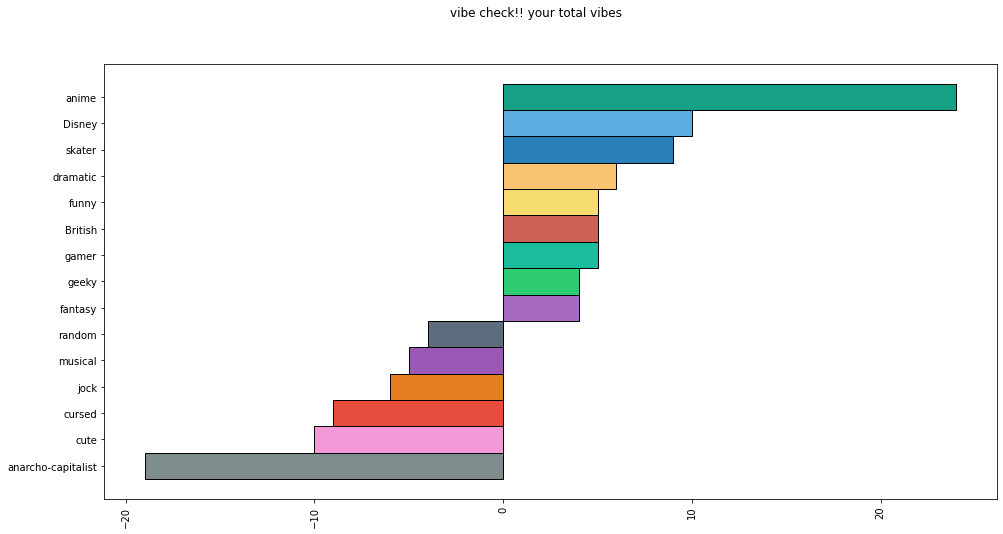

In [7]:
# a handy histogram of vibes
fig, ax = scivibes.plot_vibestogram(tot_vibes)